<a href="https://colab.research.google.com/github/shintaaulia/TK/blob/main/TK_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install Adam

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package Adam


In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from tensorflow.keras.optimizers import Adam

#KAEF

In [ ]:
train_df = pd.read_csv('https://raw.githubusercontent.com/shintaaulia/TK/main/KAEF.JK.csv')

In [ ]:
#menghapus data NAN
df = train_df.dropna()

In [ ]:
#menghilangkan data hari(date)
data = df.drop(columns=['Date'])
data_close = df[['Close']]

In [ ]:
#normalisasi data
df=(data-data.min())/(data.max()-data.min())

train_X = df
train_y = df [['Close']]
print(train_X)
print(train_y)

         Open      High       Low     Close  Adj Close    Volume
0    0.103663  0.096472  0.117450  0.104769   0.104769  0.023512
1    0.106002  0.091433  0.113255  0.099296   0.099296  0.015085
2    0.098987  0.089273  0.104866  0.092260   0.092260  0.018569
3    0.091972  0.084233  0.103188  0.090696   0.090696  0.014582
4    0.091972  0.078474  0.096477  0.084441   0.084441  0.011366
..        ...       ...       ...       ...        ...       ...
440  0.284489  0.269258  0.313758  0.290852   0.291035  0.005322
441  0.290725  0.277898  0.320470  0.295543   0.295728  0.028021
442  0.295401  0.272138  0.322148  0.293980   0.294163  0.008913
443  0.292284  0.266379  0.313758  0.287725   0.287906  0.006832
444  0.286048  0.263499  0.313758  0.289289   0.289470  0.003897

[445 rows x 6 columns]
        Close
0    0.104769
1    0.099296
2    0.092260
3    0.090696
4    0.084441
..        ...
440  0.290852
441  0.295543
442  0.293980
443  0.287725
444  0.289289

[445 rows x 1 columns]


In [ ]:
#Perhitungan Backpropagation

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from keras.layers import Activation, Dense
from keras.layers import Dropout
from keras.models import load_model
from tensorflow.keras.optimizers import Adam

In [ ]:
#Membuat model
regressor = Sequential ()

In [ ]:
#Mendapatkan nomor kolom dari data training
n_cols = train_X.shape[1]

In [ ]:
#Menambahkan input layer dan first hidden layer dan Drop out Regulation
regressor.add(Dense(units = 500, kernel_initializer = 'uniform',activation ='relu', input_shape=(n_cols,)))
regressor.add(Dropout(.2))


In [ ]:
#Menambahkan output layer
regressor.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [ ]:
# Compiling the ANN
regressor.compile(optimizer='adam', loss='mean_absolute_error')

In [ ]:
#Fitting untuk ANN dari Data Training
regressor.fit(train_X,train_y,validation_split=0.5,epochs=200)

Epoch 1/200
7/7 [==============================] - 0s 27ms/step - loss: 0.2885 - val_loss: 0.1341
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2606 - val_loss: 0.1214
Epoch 3/200
7/7 [==============================] - 0s 8ms/step - loss: 0.2410 - val_loss: 0.1183
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2339 - val_loss: 0.1179
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2255 - val_loss: 0.1160
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2153 - val_loss: 0.1119
Epoch 7/200
7/7 [==============================] - 0s 8ms/step - loss: 0.2037 - val_loss: 0.1073
Epoch 8/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1878 - val_loss: 0.1007
Epoch 9/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1697 - val_loss: 0.0925
Epoch 10/200
7/7 [==============================] - 0s 8ms/step - loss: 0.1500 - val_loss: 0.0833
Epoch 11/200
7/7 [=========

In [ ]:
#Menyimpan Model Training
regressor.save('model.h5')

In [ ]:
# Memprediksi Harga Saham pada masa yang akan datang

#Membaca data menggunakan pandas
test_df = pd.read_csv('https://raw.githubusercontent.com/shintaaulia/TK/main/KAEF.JK%20(2).csv')

#menghapus data NAN
df = train_df.dropna()

#Menghapus data kosong
test_data = test_df.drop(columns=['Date'])
data_test_close=test_df[['Close']]

#Normalisasi Data
nor=(test_data-test_data.min())/(test_data.max()-test_data.min())

#Membuat dataframe dengan semua data training except the target column
test_X=nor

#Membuat dataframe dengan hanya target column
test_y=nor[['Close']]

In [ ]:
import matplotlib.pyplot as plt
#delete the exiting model
del regressor

#load traning model
regressor = load_model('model.h5')

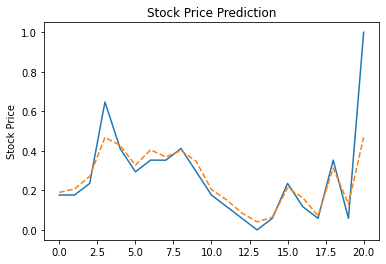

mse 0.008045190314034186


In [ ]:
####Prediksi dan Test Model####
input_data=test_X.values
real_close_price=test_y.values

predicted_close_price = regressor.predict(input_data)
target = real_close_price[~np.isnan(real_close_price)]
predict = predicted_close_price[~np.isnan(predicted_close_price)]
plt.plot(target)
plt.plot(predict,'--')
plt.title('Stock Price Prediction')
plt.ylabel('Stock Price')
plt.show()
 
def mse(predictions,target):
  return 0.5 * (((predictions-target)**2).mean())
 
#mse =((real_close_price-predicted_close_price)**2).mean(axis=1)
a = mse(predict.flatten(),target.flatten())
print('mse', a)


In [ ]:
# rebuild the Structure
dataset_pred_real = pd.DataFrame()
dataset_pred_real['real'] = target
dataset_pred_real['predicted'] = predict
dataset_pred_real

,real,predicted
0,0.176471,0.189988
1,0.176471,0.207063
2,0.235294,0.271249
3,0.647059,0.467973
4,0.411765,0.427320
5,0.294118,0.327135
6,0.352941,0.405373
7,0.352941,0.368654
8,0.411765,0.401680
9,0.294118,0.346323


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
regressor

In [ ]:
input_data_prediksi = [[]]

#KLBF

In [ ]:
train_df = pd.read_csv('https://raw.githubusercontent.com/shintaaulia/TK/main/KLBF.JK.csv')

In [ ]:
#menghapus data NAN
df = train_df.dropna()

In [ ]:
#menghilangkan data hari(date)
data = df.drop(columns=['Date'])
data_close = df[['Close']]

In [ ]:
#normalisasi data
df=(data-data.min())/(data.max()-data.min())

train_X = df
train_y = df [['Close']]
print(train_X)
print(train_y)

         Open      High       Low     Close  Adj Close    Volume
0    0.806452  0.678218  0.911243  0.837989   0.808560  0.019258
1    0.806452  0.678218  0.923077  0.860335   0.830122  0.028193
2    0.817204  0.683168  0.928994  0.865922   0.835512  0.013999
3    0.822581  0.678218  0.911243  0.860335   0.830122  0.023469
4    0.779570  0.658416  0.893491  0.804469   0.776218  0.015962
..        ...       ...       ...       ...        ...       ...
440  0.629032  0.524752  0.721893  0.670391   0.706783  0.032578
441  0.655914  0.648515  0.769231  0.754190   0.790707  0.228208
442  0.720430  0.648515  0.804734  0.821229   0.857847  0.225601
443  0.795699  0.653465  0.887574  0.810056   0.846657  0.140155
444  0.784946  0.648515  0.899408  0.821229   0.857847  0.212988

[445 rows x 6 columns]
        Close
0    0.837989
1    0.860335
2    0.865922
3    0.860335
4    0.804469
..        ...
440  0.670391
441  0.754190
442  0.821229
443  0.810056
444  0.821229

[445 rows x 1 columns]


In [ ]:
#Perhitungan Backpropagation

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from keras.layers import Activation, Dense
from keras.layers import Dropout
from keras.models import load_model

In [ ]:
#Membuat model
regressor = Sequential ()

In [ ]:
#Mendapatkan nomor kolom dari data training
n_cols = train_X.shape[1]

In [ ]:
#Menambahkan input layer dan first hidden layer dan Drop out Regulation
regressor.add(Dense(units = 500, kernel_initializer = 'uniform',activation ='relu', input_shape=(n_cols,)))
regressor.add(Dropout(.2))


In [ ]:
#Menambahkan output layer
regressor.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [ ]:
# Compiling the ANN
regressor.compile(optimizer='adam', loss='mean_absolute_error')

In [ ]:
#Fitting untuk ANN dari Data Training
regressor.fit(train_X,train_y,validation_split=0.5,epochs=200)

Epoch 1/200
7/7 [==============================] - 0s 25ms/step - loss: 0.1836 - val_loss: 0.1108
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1401 - val_loss: 0.0747
Epoch 3/200
7/7 [==============================] - 0s 8ms/step - loss: 0.1116 - val_loss: 0.0674
Epoch 4/200
7/7 [==============================] - 0s 9ms/step - loss: 0.1058 - val_loss: 0.0753
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 0.1040 - val_loss: 0.0651
Epoch 6/200
7/7 [==============================] - 0s 8ms/step - loss: 0.1016 - val_loss: 0.0621
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0987 - val_loss: 0.0623
Epoch 8/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0957 - val_loss: 0.0675
Epoch 9/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0915 - val_loss: 0.0584
Epoch 10/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0901 - val_loss: 0.0566
Epoch 11/200
7/7 [==========

In [ ]:
#Menyimpan Model Training
regressor.save('model.h5')

In [ ]:
# Memprediksi Harga Saham pada masa yang akan datang

#Membaca data menggunakan pandas
test_df = pd.read_csv('https://raw.githubusercontent.com/shintaaulia/TK/main/KLBF.JK.csv')

#menghapus data NAN
df = train_df.dropna()

#Menghapus data kosong
test_data = test_df.drop(columns=['Date'])
data_test_close=test_df[['Close']]

#Normalisasi Data
nor=(test_data-test_data.min())/(test_data.max()-test_data.min())

#Membuat dataframe dengan semua data training except the target column
test_X=nor

#Membuat dataframe dengan hanya target column
test_y=nor[['Close']]

In [ ]:
import matplotlib.pyplot as plt
#delete the exiting model
del regressor

#load traning model
regressor = load_model('model.h5')

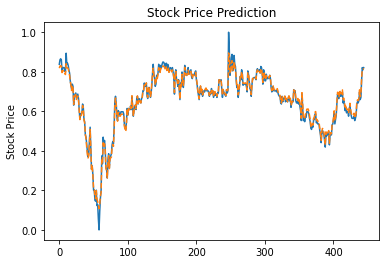

mse 8.678389493454006e-05


In [ ]:
####Prediksi dan Test Model####
input_data=test_X.values
real_close_price=test_y.values

predicted_close_price = regressor.predict(input_data)
target = real_close_price[~np.isnan(real_close_price)]
predict = predicted_close_price[~np.isnan(predicted_close_price)]
plt.plot(target)
plt.plot(predict,'--')
plt.title('Stock Price Prediction')
plt.ylabel('Stock Price')
plt.show()
 
def mse(predictions,target):
  return 0.5 * (((predictions-target)**2).mean())
 
#mse =((real_close_price-predicted_close_price)**2).mean(axis=1)
b = mse(predict.flatten(),target.flatten())
print('mse', b)


#HEAL

In [ ]:
train_df = pd.read_csv('https://raw.githubusercontent.com/shintaaulia/TK/main/HEAL.JK.csv')

In [ ]:
#menghapus data NAN
df = train_df.dropna()

In [ ]:
#menghilangkan data hari(date)
data = df.drop(columns=['Date'])
data_close = df[['Close']]

In [ ]:
#normalisasi data
df=(data-data.min())/(data.max()-data.min())

train_X = df
train_y = df [['Close']]
print(train_X)
print(train_y)

In [ ]:
#Perhitungan Backpropagation

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from keras.layers import Activation, Dense
from keras.layers import Dropout
from keras.models import load_model

In [ ]:
#Membuat model
regressor = Sequential ()

In [ ]:
#Mendapatkan nomor kolom dari data training
n_cols = train_X.shape[1]

In [ ]:
#Menambahkan input layer dan first hidden layer dan Drop out Regulation
regressor.add(Dense(units = 500, kernel_initializer = 'uniform',activation ='relu', input_shape=(n_cols,)))
regressor.add(Dropout(.2))


In [ ]:
#Menambahkan output layer
regressor.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [ ]:
# Compiling the ANN
regressor.compile(optimizer='adam', loss='mean_absolute_error')

In [ ]:
#Fitting untuk ANN dari Data Training
regressor.fit(train_X,train_y,validation_split=0.5,epochs=200)

Epoch 1/200
7/7 [==============================] - 1s 66ms/step - loss: 0.2220 - val_loss: 0.2510
Epoch 2/200
7/7 [==============================] - 0s 8ms/step - loss: 0.1875 - val_loss: 0.3185
Epoch 3/200
7/7 [==============================] - 0s 8ms/step - loss: 0.1459 - val_loss: 0.4044
Epoch 4/200
7/7 [==============================] - 0s 8ms/step - loss: 0.1024 - val_loss: 0.4895
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0846 - val_loss: 0.5412
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0865 - val_loss: 0.5441
Epoch 7/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0839 - val_loss: 0.5198
Epoch 8/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0791 - val_loss: 0.4998
Epoch 9/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0784 - val_loss: 0.4993
Epoch 10/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0769 - val_loss: 0.5076
Epoch 11/200
7/7 [==========

In [ ]:
#Menyimpan Model Training
regressor.save('model.h5')

In [ ]:
# Memprediksi Harga Saham pada masa yang akan datang

#Membaca data menggunakan pandas
test_df = pd.read_csv('https://raw.githubusercontent.com/shintaaulia/TK/main/HEAL.JK.csv')

#menghapus data NAN
df = train_df.dropna()

#Menghapus data kosong
test_data = test_df.drop(columns=['Date'])
data_test_close=test_df[['Close']]

#Normalisasi Data
nor=(test_data-test_data.min())/(test_data.max()-test_data.min())

#Membuat dataframe dengan semua data training except the target column
test_X=nor

#Membuat dataframe dengan hanya target column
test_y=nor[['Close']]

In [ ]:
import matplotlib.pyplot as plt
#delete the exiting model
del regressor

#load traning model
regressor = load_model('model.h5')

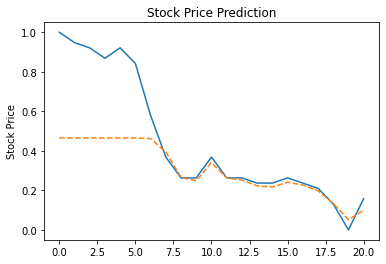

mse 0.030023747006623733


In [ ]:
####Prediksi dan Test Model####
input_data=test_X.values
real_close_price=test_y.values

predicted_close_price = regressor.predict(input_data)
target = real_close_price[~np.isnan(real_close_price)]
predict = predicted_close_price[~np.isnan(predicted_close_price)]
plt.plot(target)
plt.plot(predict,'--')
plt.title('Stock Price Prediction')
plt.ylabel('Stock Price')
plt.show()
 
def mse(predictions,target):
  return 0.5 * (((predictions-target)**2).mean())
 
#mse =((real_close_price-predicted_close_price)**2).mean(axis=1)
c = mse(predict.flatten(),target.flatten())
print('mse', c)


In [ ]:
pip install tabulate

In [ ]:

from tabulate import tabulate

In [ ]:
table = [['SAHAM', 'MSE'], ['KAEF', a], ['KLBF', b], ['HEAL', c]]


In [ ]:
print(tabulate(table,headers='firstrow'))

SAHAM           MSE
-------  ----------
KAEF     0.00809156
KLBF     0.00238617
HEAL     0.0300237
